In [1]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Development team: Stéphane Sénési (CNRM-GAME), Gaëlle Rigoudy (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL), Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##   
##### contact: climaf@meteo.fr
##### users list: climaf-users@meteo.fr

### Foreword: why working with CliMAF ensembles?
A CliMAF ensemble is basically:
- a python dictionnary
- with additionnal features such as a given order of the elements
- recognized by the CliMAF operators to:
   - automatically apply the operator on all the members in one command line
     (for those that normally take one single dataset)
   - compute ensemble statistics (using ccdo_ens, among others)
   - do multiplots with cpage and plot
  
All the members are tagged with a name, or 'key'. This name will be used automatically by the operators that include ${labels} in the cscript declaration, such as plot.

# Working with CliMAF ensembles
In this notebook we will see how to:
- 1. make a CMIP5 ensemble with explore('ensemble')
- 2. make a basic CMIP6 ensemble: all realizations of one model
- 3. make an ensemble with eds: specify explicitly the content of the ensemble
- 4. Quick example of treatments and multiplot with cpage
- 4. Modify its content and set the order of the members
- 5. Make an ensemble by hand with cens
- 6. Use ensemble_intersection to create a list of ensembles with only their common members 
- 7. Merge ensembles
- 8. Get the path/filenames of all my pretreated files with tagnames

CMIP6 and CORDEX are treated more specifically in two additionnal notebooks:
- CMIP6_ensembles_analysis_with_CliMAF.ipynb
- CORDEX_ensembles_analysis_with_CliMAF.ipynb
#  

## First, import climaf

In [2]:
from climaf.api import *

CliMAF version = 1.2.13


CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post
python => /modfs/modtools/miniconda2/envs/analyse_2.7/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.3.0 => /opt/ncl-6.3.0/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /modfs/modtools/miniconda2/envs/analyse_2.7/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /opt/nco-4.5.2/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post/bin/exiv2
---


Cache directory set to : /data/jservon/climafcache_test (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache_test/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


## And set verbosity ('critical' -> minimum ; 'debug' -> maximum)

In [3]:
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

### ... and dont' forget to open the documentation in case you have questions.

### http://climaf.readthedocs.org/

### -> Use the "Quick search" space to search for what you are interested in, it is really powerfull!
#  
#  

## 1. how to make a CMIP5 ensemble with explore('ensemble')
### The .explore() method is a very easy way to:
- retrieve all the available models for a request
- or realizations

### Here we want to make a multi-model ensemble, with one realization (r1i1p1 by default)

In [4]:
# -- CMIP5: how to get all the models 
req_cmip5 = ds(project='CMIP5',
               model='*',
               variable='tos',
               experiment='historical',
               period='1980-2000',
               frequency='monthly',
               version='latest'
               )

# -- We use .explore('choices') to see all the possible values taken by model
req_cmip5.explore('choices')

{'model': ['ACCESS1-0',
  'ACCESS1-3',
  'CCSM4',
  'CESM1-BGC',
  'CESM1-CAM5',
  'CESM1-CAM5-1-FV2',
  'CESM1-FASTCHEM',
  'CESM1-WACCM',
  'CMCC-CESM',
  'CMCC-CM',
  'CMCC-CMS',
  'CNRM-CM5',
  'CNRM-CM5-2',
  'CSIRO-Mk3-6-0',
  'CanCM4',
  'CanESM2',
  'EC-EARTH',
  'FGOALS-g2',
  'GFDL-CM2p1',
  'GFDL-CM3',
  'GFDL-ESM2G',
  'GFDL-ESM2M',
  'GISS-E2-H',
  'GISS-E2-H-CC',
  'GISS-E2-R',
  'GISS-E2-R-CC',
  'HadCM3',
  'HadGEM2-AO',
  'HadGEM2-CC',
  'HadGEM2-ES',
  'IPSL-CM5A-LR',
  'IPSL-CM5A-MR',
  'IPSL-CM5B-LR',
  'MIROC-ESM',
  'MIROC-ESM-CHEM',
  'MIROC5',
  'MRI-CGCM3',
  'MRI-ESM1',
  'NorESM1-M',
  'NorESM1-ME',
  'bcc-csm1-1',
  'bcc-csm1-1-m',
  'inmcm4'],
 'realm': 'ocean',
 'table': 'Omon'}

### We can see that we have only one key (model) that has a list of values. Note that if we have more than one key with a list of values, we can't use directly explore('ensemble').

In [5]:
ens_cmip5 = req_cmip5.explore('ensemble')
summary(ens_cmip5)

Keys - values:
{'domain': 'global', 'realm': 'ocean', 'version': 'latest', 'period': 1980-2000, 'simulation': '', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tos', 'table': 'Omon', 'model': 'ACCESS1-0', 'root': '/bdd'}
-- Ensemble members:
ACCESS1-0
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
--
ACCESS1-3
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
--
CCSM4
/bdd/CMIP5/output/NCAR/CCSM4/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CCSM4_historical_r1i1p1_185001-200512.nc
--
CESM1-BGC
/bdd/CMIP5/output/NSF-DOE-NCAR/CESM1-BGC/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CESM1-BGC_historical_r1i1p1_185001-200512.nc
--
CESM1-CAM5
/bdd/CMIP5/output/NSF-DOE-NCAR/CESM1-CAM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CESM1-

/bdd/CMIP5/output/NASA-GISS/GISS-E2-R-CC/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_GISS-E2-R-CC_historical_r1i1p1_197601-200012.nc
--
HadCM3
/bdd/CMIP5/output/MOHC/HadCM3/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_HadCM3_historical_r1i1p1_195912-198411.nc
/bdd/CMIP5/output/MOHC/HadCM3/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_HadCM3_historical_r1i1p1_198412-200512.nc
--
HadGEM2-AO
/bdd/CMIP5/output/NIMR-KMA/HadGEM2-AO/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_HadGEM2-AO_historical_r1i1p1_186001-200512.nc
--
HadGEM2-CC
/bdd/CMIP5/output/MOHC/HadGEM2-CC/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_HadGEM2-CC_historical_r1i1p1_195912-200511.nc
--
HadGEM2-ES
/bdd/CMIP5/output/MOHC/HadGEM2-ES/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_HadGEM2-ES_historical_r1i1p1_195912-200512.nc
--
IPSL-CM5A-LR
/bdd/CMIP5/output/IPSL/IPSL-CM5A-LR/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_IPSL-CM5A-LR_historical_r1i1p1_185001-200512.nc


### ==> We have created a CliMAF ensemble called ens_cmip5, which means that I can (among others):
- apply automatically an operator to all the members
- compute ensemble statistics on this ensemble (for instance, with ccdo_ens)

In [6]:
# -- Let's compute the annual mean of all the members
anm_ens_cmip5 = clim_average(ens_cmip5, 'ANM')
# -> Note that anm_ens_cmip5 is also a CliMAF ensemble

# -- Now I can use anm_ens_cmip5 to compute an ensemble average
ensavg_anm_ens_cmip5 = ccdo_ens(anm_ens_cmip5, operator='ensavg')

## 2. Multi-realization CMIP6 CliMAF ensemble on one model

The CMIP6 project is addressed in details in an additionnal notebook: CMIP6_analysis_with_CliMAF.ipynb

The CMIP6 archive is slightly different from the CMIP5 archive.

The key 'institute' and the new key 'grid' implies that we can't build a CMIP6 multi-model ensemble in one move with .explore('ensemble') (example and solution below), since we easily have more than one key with multiple values.

Building a multi-realization ensemble on one model still remains an easy task.

In [7]:
# -- Let's start with an easy example, with the same behavior as described
#    for the CMIP5 multi-model ensemble
req_cmip6 = ds(project='CMIP6', variable='pr', period='*',
               table='Amon', model='CNRM-CM6-1',
               realization='*'
              )

req_cmip6.explore('choices')

{'grid': 'gr',
 'institute': 'CNRM-CERFACS',
 'mip': 'CMIP',
 'period': [1850-2014],
 'realization': ['r10i1p1f2',
  'r11i1p1f2',
  'r12i1p1f2',
  'r13i1p1f2',
  'r14i1p1f2',
  'r15i1p1f2',
  'r16i1p1f2',
  'r17i1p1f2',
  'r18i1p1f2',
  'r19i1p1f2',
  'r1i1p1f2',
  'r20i1p1f2',
  'r21i1p1f2',
  'r22i1p1f2',
  'r24i1p1f2',
  'r25i1p1f2',
  'r26i1p1f2',
  'r27i1p1f2',
  'r28i1p1f2',
  'r2i1p1f2',
  'r30i1p1f2',
  'r3i1p1f2',
  'r4i1p1f2',
  'r5i1p1f2',
  'r6i1p1f2',
  'r7i1p1f2',
  'r8i1p1f2',
  'r9i1p1f2']}

In [8]:
# -- realization is the only key with a list of values, we can thus use .explore('ensemble')
#    to create an ensemble
multirealization_cmip6 = req_cmip6.explore('ensemble')

summary(multirealization_cmip6)

Keys - values:
{'domain': 'global', 'version': 'latest', 'institute': 'CNRM-CERFACS', 'realization': 'r26i1p1f2', 'period': 1850-2014, 'simulation': '', 'project': 'CMIP6', 'experiment': 'historical', 'grid': 'gr', 'table': 'Amon', 'variable': 'pr', 'mip': 'CMIP', 'model': 'CNRM-CM6-1', 'root': '/bdd'}
-- Ensemble members:
r10i1p1f2
/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r10i1p1f2/Amon/pr/gr/latest/pr_Amon_CNRM-CM6-1_historical_r10i1p1f2_gr_185001-201412.nc
--
r11i1p1f2
/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r11i1p1f2/Amon/pr/gr/latest/pr_Amon_CNRM-CM6-1_historical_r11i1p1f2_gr_185001-201412.nc
--
r12i1p1f2
/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r12i1p1f2/Amon/pr/gr/latest/pr_Amon_CNRM-CM6-1_historical_r12i1p1f2_gr_185001-201412.nc
--
r13i1p1f2
/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r13i1p1f2/Amon/pr/gr/latest/pr_Amon_CNRM-CM6-1_historical_r13i1p1f2_gr_185001-201412.nc
--
r14i1p1f2
/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r14i1p

## 3. make an ensemble with eds (instead of ds()): specify explicitly the members of the ensemble

In [9]:
ens_cmip5 = eds(project='CMIP5',
               model=['IPSL-CM5A-MR','CNRM-CM5'],
               variable='tos',
               experiment='historical',
               period='1980-2000',
               frequency='monthly',
               realization='r1i1p1',
               )
summary(ens_cmip5)

Keys - values:
{'domain': 'global', 'realm': '*', 'version': 'latest', 'period': 1980-2000, 'simulation': '', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tos', 'table': '*', 'model': 'CNRM-CM5', 'root': '/bdd'}
-- Ensemble members:
IPSL-CM5A-MR
/bdd/CMIP5/output/IPSL/IPSL-CM5A-MR/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_IPSL-CM5A-MR_historical_r1i1p1_185001-200512.nc
--
CNRM-CM5
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_200001-200512.nc
--


## 4. Quick example to illustrate the pretreatments and multiplot with cpage 

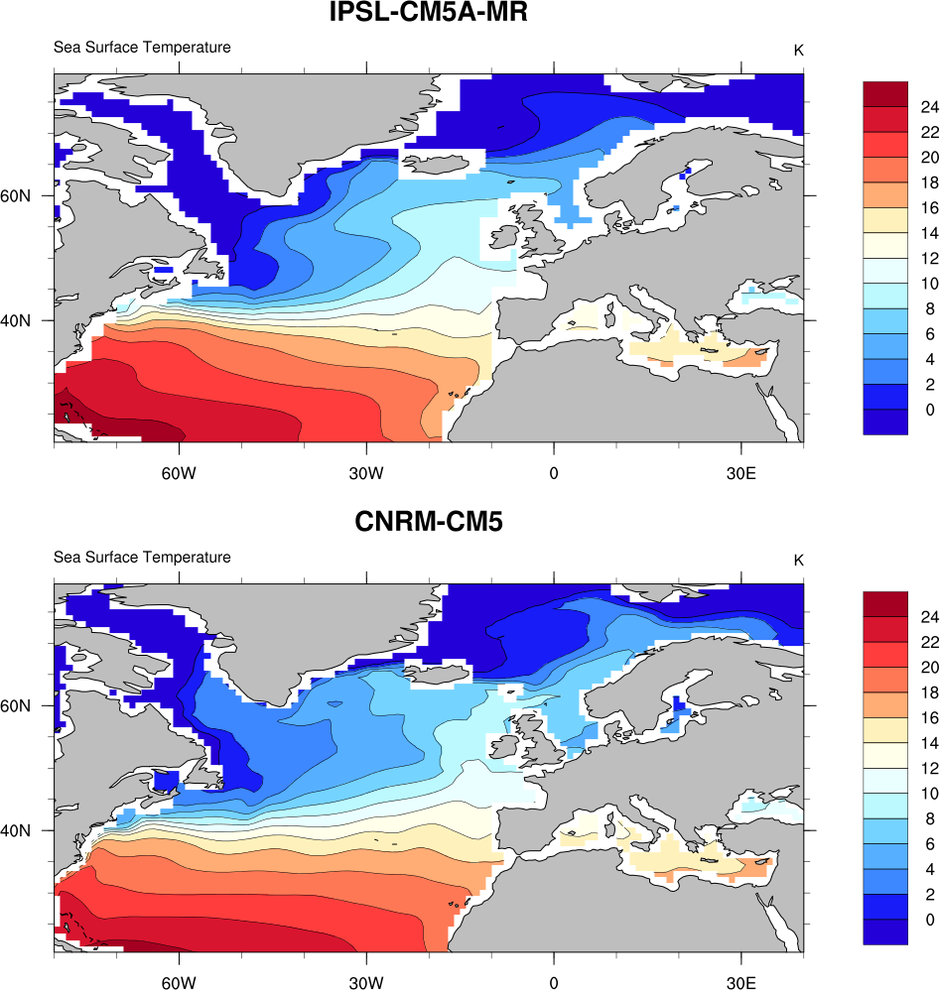

In [10]:
# -- On every member I will apply:

# --   - a DJF average
djf_ens_cmip5 = clim_average(ens_cmip5, 'DJF')

# --   - a regridding on a common grid
rgrd_djf_ens_cmip5 = regridn(djf_ens_cmip5, cdogrid='r360x180')
    
# --   - a selection of geographical domain
NAtl_rgrd_djf_ens_cmip5 = llbox(rgrd_djf_ens_cmip5, lonmin=-80, lonmax=40, latmin=20, latmax=80)

# -- And do a multiplot (warning: limited to 24 plots...)
pp = dict(focus='ocean', offset=-273.15, contours=1)
#   -> see plot() documentation: https://climaf.readthedocs.io/en/latest/scripts/plot.html
mp = cpage( plot(NAtl_rgrd_djf_ens_cmip5, **pp) )

iplot(mp)

## 5. Modify the content of an ensemble: add/retrieve members, do specific treatments on some of them...
## and set the order of the members

### We will use a CMIP5_extent example, for all available models do not cover the period (as previously shown in part 1)

In [11]:
req_cmip5_extent = ds(project='CMIP5_extent', variable='tas', experiment='historical',
                      model='*', period='1990-2010', table='Amon', version='latest')

ens_cmip5_extent = req_cmip5_extent.explore('ensemble')

### The CliMAF ensemble object behaves very similarly as a python dictionary.
### So, as for python dictionaries:
- we remove elements with .pop(elt)
- add new ones with .update(dict(new_member=...))

### Note that:
- It is possible to modify directly the ensemble object
- but it might be safer to make a copy and modify the copy


### Example with a copy: 

In [12]:
ok_ens_cmip5_extent = ens_cmip5_extent.copy()

### Here, we want to retrieve the members that do not cover the requested period
### We make a loop on the elements of the object
- each 'elt' is a key of the ensemble
- and we access its value with ens_cmip5_extent[elt]

In [13]:
for elt in ens_cmip5_extent:
    print elt
    # -- Apply the time consistency check 
    if not check_time_consistency_CMIP(ens_cmip5_extent[elt]):
        # -- And remove the elements that do not pass the test
        print 'period not covered for ',elt
        ok_ens_cmip5_extent.pop(elt)

ACCESS1-0
ACCESS1-3
FGOALS-g2
period not covered for  FGOALS-g2
FIO-ESM
CMCC-CMS
MIROC-ESM
HadGEM2-AO
CMCC-CM
HadGEM2-ES
MRI-ESM1
MPI-ESM-MR
CSIRO-Mk3-6-0
CESM1-BGC
inmcm4
CanESM2
GISS-E2-R-CC
BNU-ESM
IPSL-CM5B-LR
GFDL-ESM2G
EC-EARTH
period not covered for  EC-EARTH
GFDL-ESM2M
CCSM4
NorESM1-M
IPSL-CM5A-MR
IPSL-CM5A-LR
GFDL-CM3
CNRM-CM5
GISS-E2-H
MIROC-ESM-CHEM
MRI-CGCM3
NorESM1-ME
MIROC5
GISS-E2-R
HadGEM2-CC
GISS-E2-H-CC
CMCC-CESM
bcc-csm1-1-m
MPI-ESM-LR
bcc-csm1-1
period not covered for  bcc-csm1-1
CESM1-CAM5


### Let's have a look at the ensemble:

In [14]:
ok_ens_cmip5_extent

cens({'ACCESS1-0':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%ACCESS1-0%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'ACCESS1-3':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%ACCESS1-3%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'BNU-ESM':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%BNU-ESM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CCSM4':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CCSM4%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CESM1-BGC':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CESM1-BGC%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CESM1-CAM5':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CESM1-CAM5%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CMCC-CESM':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CMCC-CESM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CMCC-CM':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CMCC-CM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CMCC-CMS':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CMCC-CMS%Amon%historical%rcp85%r1i1p1%mon

### Trivial example of how to add a member:

In [15]:
new_member = ds(project='ref_ts', variable='tos', product='HadISST')
ok_new_member = new_member.explore('resolve')

summary(ok_new_member)

/data/jservon/Evaluation/ReferenceDatasets/ts/oce/mo/tos/tos_Omon_HadISST_observations_187001-201204.nc


{'domain': 'global',
 'frequency': 'monthly',
 'obs_type': 'observations',
 'period': 1980-2005,
 'product': 'HadISST',
 'project': 'ref_ts',
 'simulation': 'refproduct',
 'table': 'Omon',
 'variable': 'tos'}

### Use update => the member is added to the CliMAF ensemble

In [16]:
ok_ens_cmip5_extent.update(dict(HadISST=ok_new_member))

ok_ens_cmip5_extent

cens({'ACCESS1-0':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%ACCESS1-0%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'ACCESS1-3':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%ACCESS1-3%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'BNU-ESM':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%BNU-ESM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CCSM4':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CCSM4%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CESM1-BGC':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CESM1-BGC%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CESM1-CAM5':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CESM1-CAM5%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CMCC-CESM':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CMCC-CESM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CMCC-CM':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CMCC-CM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CMCC-CMS':ds('CMIP5_extent%%tas%1990-2010%global%/bdd%CMCC-CMS%Amon%historical%rcp85%r1i1p1%mon

### Modify the order of the members: CliMAF handles the members of the ensemble in a specific order set in my_ens.order
### You can directly modify it:

In [17]:
ok_ens_cmip5_extent.order

['ACCESS1-0',
 'ACCESS1-3',
 'BNU-ESM',
 'CCSM4',
 'CESM1-BGC',
 'CESM1-CAM5',
 'CMCC-CESM',
 'CMCC-CM',
 'CMCC-CMS',
 'CNRM-CM5',
 'CSIRO-Mk3-6-0',
 'CanESM2',
 'FIO-ESM',
 'GFDL-CM3',
 'GFDL-ESM2G',
 'GFDL-ESM2M',
 'GISS-E2-H',
 'GISS-E2-H-CC',
 'GISS-E2-R',
 'GISS-E2-R-CC',
 'HadGEM2-AO',
 'HadGEM2-CC',
 'HadGEM2-ES',
 'IPSL-CM5A-LR',
 'IPSL-CM5A-MR',
 'IPSL-CM5B-LR',
 'MIROC-ESM',
 'MIROC-ESM-CHEM',
 'MIROC5',
 'MPI-ESM-LR',
 'MPI-ESM-MR',
 'MRI-CGCM3',
 'MRI-ESM1',
 'NorESM1-M',
 'NorESM1-ME',
 'bcc-csm1-1-m',
 'inmcm4',
 'HadISST']

In [18]:
# -- We will put HadISST first, and sort the models in alphabetical order
tmp_members = ok_ens_cmip5_extent.order

# -- Remove HadISST from the list
tmp_members.remove('HadISST')

new_order = ['HadISST'] + sorted(tmp_members)
new_order

['HadISST',
 'ACCESS1-0',
 'ACCESS1-3',
 'BNU-ESM',
 'CCSM4',
 'CESM1-BGC',
 'CESM1-CAM5',
 'CMCC-CESM',
 'CMCC-CM',
 'CMCC-CMS',
 'CNRM-CM5',
 'CSIRO-Mk3-6-0',
 'CanESM2',
 'FIO-ESM',
 'GFDL-CM3',
 'GFDL-ESM2G',
 'GFDL-ESM2M',
 'GISS-E2-H',
 'GISS-E2-H-CC',
 'GISS-E2-R',
 'GISS-E2-R-CC',
 'HadGEM2-AO',
 'HadGEM2-CC',
 'HadGEM2-ES',
 'IPSL-CM5A-LR',
 'IPSL-CM5A-MR',
 'IPSL-CM5B-LR',
 'MIROC-ESM',
 'MIROC-ESM-CHEM',
 'MIROC5',
 'MPI-ESM-LR',
 'MPI-ESM-MR',
 'MRI-CGCM3',
 'MRI-ESM1',
 'NorESM1-M',
 'NorESM1-ME',
 'bcc-csm1-1-m',
 'inmcm4']

### Use the method .set_order() to pass the new order

In [19]:
ok_ens_cmip5_extent.set_order(new_order)

### And here is my modified ensemble with the new order:

In [20]:
ok_ens_cmip5_extent.order

['HadISST',
 'ACCESS1-0',
 'ACCESS1-3',
 'BNU-ESM',
 'CCSM4',
 'CESM1-BGC',
 'CESM1-CAM5',
 'CMCC-CESM',
 'CMCC-CM',
 'CMCC-CMS',
 'CNRM-CM5',
 'CSIRO-Mk3-6-0',
 'CanESM2',
 'FIO-ESM',
 'GFDL-CM3',
 'GFDL-ESM2G',
 'GFDL-ESM2M',
 'GISS-E2-H',
 'GISS-E2-H-CC',
 'GISS-E2-R',
 'GISS-E2-R-CC',
 'HadGEM2-AO',
 'HadGEM2-CC',
 'HadGEM2-ES',
 'IPSL-CM5A-LR',
 'IPSL-CM5A-MR',
 'IPSL-CM5B-LR',
 'MIROC-ESM',
 'MIROC-ESM-CHEM',
 'MIROC5',
 'MPI-ESM-LR',
 'MPI-ESM-MR',
 'MRI-CGCM3',
 'MRI-ESM1',
 'NorESM1-M',
 'NorESM1-ME',
 'bcc-csm1-1-m',
 'inmcm4']

## 6. Make an ensemble by hand: cens()
https://climaf.readthedocs.io/en/master/functions_data.html?highlight=cens#cens-define-an-ensemble-of-objects

### Get three datasets by hand: three decades of the same simulation

In [21]:
req_dict = dict(project='CMIP6', 
                model='IPSL-CM6A-LR',
                experiment='historical',
                variable='tas',
                table='Amon')
m1 = ds(period='1980-1989', **req_dict)
m2 = ds(period='1990-1999', **req_dict)
m3 = ds(period='2000-2009', **req_dict)

print m1.explore('choices')
print m2.explore('choices')
print m3.explore('choices')

{'institute': 'IPSL', 'mip': 'CMIP', 'grid': 'gr', 'realization': 'r1i1p1f1'}
{'institute': 'IPSL', 'mip': 'CMIP', 'grid': 'gr', 'realization': 'r1i1p1f1'}
{'institute': 'IPSL', 'mip': 'CMIP', 'grid': 'gr', 'realization': 'r1i1p1f1'}


### And create the ensemble with cens()

In [22]:
ens_by_decades_r1i1p1f1 = cens( {'CMIP6_1980-1989': m1.explore('resolve'),
                                 'CMIP6_1990-1999': m2.explore('resolve'),
                                 'CMIP6_2000-2009': m3.explore('resolve')
                                },
                               order=['CMIP6_1980-1989', 'CMIP6_1990-1999', 'CMIP6_2000-2009']
                              )

In [23]:
ens_by_decades_r1i1p1f1

cens({'CMIP6_1980-1989':ds('CMIP6%%tas%1980-1989%global%/bdd%IPSL-CM6A-LR%IPSL%CMIP%Amon%historical%r1i1p1f1%gr%latest'),'CMIP6_1990-1999':ds('CMIP6%%tas%1990-1999%global%/bdd%IPSL-CM6A-LR%IPSL%CMIP%Amon%historical%r1i1p1f1%gr%latest'),'CMIP6_2000-2009':ds('CMIP6%%tas%2000-2009%global%/bdd%IPSL-CM6A-LR%IPSL%CMIP%Amon%historical%r1i1p1f1%gr%latest')})

In [24]:
ens_by_decades_r1i1p1f1.order

['CMIP6_1980-1989', 'CMIP6_1990-1999', 'CMIP6_2000-2009']

## 7. ensemble_intersection, a quick way to get ensembles with the members they have in common 

### When we build two ensembles with two different requests (or more), they might not share the exact same members. The function ensemble_intersection takes this kind of 'raw' ensembles as input and returns a python list of ensembles with only the members they have in common.

In [25]:
hist_req = ds(project='CMIP5', experiment='historical', period='1980-2000',
              model='*', variable='tas', frequency='monthly', version='latest')

rcp85_req = ds(project='CMIP5', experiment='rcp85', period='2040-2060',
              model='*', variable='tas', frequency='monthly', version='latest')


print 'explore("choices") for request on historicals = '
print hist_req.explore('choices')
print '--'
print '--'
print 'explore("choices") for request on rcp85 = '
print rcp85_req.explore('choices')
print '--'
print '--'

explore("choices") for request on historicals = 
{'table': 'Amon', 'model': ['ACCESS1-0', 'ACCESS1-3', 'BNU-ESM', 'CCSM4', 'CESM1-BGC', 'CESM1-CAM5', 'CESM1-FASTCHEM', 'CESM1-WACCM', 'CMCC-CESM', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CNRM-CM5-2', 'CSIRO-Mk3-6-0', 'CanCM4', 'CanESM2', 'FIO-ESM', 'GFDL-CM2p1', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'GISS-E2-H', 'GISS-E2-H-CC', 'GISS-E2-R', 'GISS-E2-R-CC', 'HadCM3', 'HadGEM2-AO', 'HadGEM2-CC', 'HadGEM2-ES', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'MIROC4h', 'MIROC5', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MPI-ESM-P', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M', 'NorESM1-ME', 'bcc-csm1-1-m', 'inmcm4'], 'realm': 'atmos'}
--
--
explore("choices") for request on rcp85 = 
{'table': 'Amon', 'model': ['ACCESS1-0', 'ACCESS1-3', 'BNU-ESM', 'CCSM4', 'CESM1-BGC', 'CESM1-CAM5', 'CMCC-CESM', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'EC-EARTH', 'FGOALS-g2', 'FIO-ESM', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'G

In [26]:
# -- First, we build the two 'raw' ensembles
hist_tmp_ens = hist_req.explore('ensemble')
rcp85_tmp_ens = rcp85_req.explore('ensemble')

In [27]:
# -- and then we use ensemble_intersection to get the same ensembles but only
#    with the members they have in common
hist_ensemble, rcp85_ensemble = ensemble_intersection([hist_tmp_ens, rcp85_tmp_ens])

In [28]:
print hist_ensemble.keys()
print rcp85_ensemble.keys()

['ACCESS1-0', 'ACCESS1-3', 'IPSL-CM5B-LR', 'FIO-ESM', 'CMCC-CMS', 'MIROC-ESM', 'HadGEM2-ES', 'CMCC-CM', 'MPI-ESM-MR', 'CSIRO-Mk3-6-0', 'CESM1-BGC', 'HadGEM2-AO', 'inmcm4', 'CanESM2', 'GISS-E2-R-CC', 'BNU-ESM', 'CCSM4', 'GFDL-ESM2G', 'MRI-CGCM3', 'GFDL-ESM2M', 'NorESM1-M', 'IPSL-CM5A-MR', 'IPSL-CM5A-LR', 'GFDL-CM3', 'CNRM-CM5', 'GISS-E2-H', 'MIROC-ESM-CHEM', 'NorESM1-ME', 'MIROC5', 'GISS-E2-R', 'HadGEM2-CC', 'GISS-E2-H-CC', 'CMCC-CESM', 'bcc-csm1-1-m', 'MPI-ESM-LR', 'MRI-ESM1', 'CESM1-CAM5']
['ACCESS1-0', 'ACCESS1-3', 'IPSL-CM5B-LR', 'FIO-ESM', 'CMCC-CMS', 'MIROC-ESM', 'HadGEM2-ES', 'CMCC-CM', 'MPI-ESM-MR', 'CSIRO-Mk3-6-0', 'CESM1-BGC', 'HadGEM2-AO', 'inmcm4', 'CanESM2', 'GISS-E2-R-CC', 'BNU-ESM', 'CCSM4', 'GFDL-ESM2G', 'MRI-CGCM3', 'GFDL-ESM2M', 'NorESM1-M', 'IPSL-CM5A-MR', 'IPSL-CM5A-LR', 'GFDL-CM3', 'CNRM-CM5', 'GISS-E2-H', 'MIROC-ESM-CHEM', 'NorESM1-ME', 'MIROC5', 'GISS-E2-R', 'HadGEM2-CC', 'GISS-E2-H-CC', 'CMCC-CESM', 'bcc-csm1-1-m', 'MPI-ESM-LR', 'MRI-ESM1', 'CESM1-CAM5']


### hist_ensemble and rcp85_ensemble have the same members

### It also works with more than two ensembles

In [29]:
# -- and then we use ensemble_intersection to get the same ensembles but only
#    with the members they have in common
hist_tmp_ens2 = hist_tmp_ens.copy() # -- we make a trivial third ensemble just for the example
list_of_ensembles = ensemble_intersection([hist_tmp_ens, rcp85_tmp_ens, hist_tmp_ens2])

In [30]:
hist_ensemble = list_of_ensembles[0]
rcp85_ensemble = list_of_ensembles[1]
hist2_ensemble = list_of_ensembles[2]

## 8. Merge ensembles
Merging ensembles can be very useful if you want to make the same treatment on all the members.
Let's say that you have a climatology over the historical period for an ensemble, and a climatology in a scenario, and that you want to retrieve all the pretreated files.

This example is the preparation for last point: get the path/filenames of all the pretreated members ready to be used in my favourite script without having to plug my script in CliMAF.

### We restart with hist_ensemble and rcp85_ensemble
### Before merging, we need to rename the members:

In [31]:
renamed_hist_ensemble = add_prefix_suffix_to_ens_req(hist_ensemble, suffix='_hist')
renamed_rcp85_ensemble = add_prefix_suffix_to_ens_req(rcp85_ensemble, suffix='_rcp85')

In [32]:
renamed_hist_ensemble.keys()

['ACCESS1-0_hist',
 'MPI-ESM-LR_hist',
 'IPSL-CM5B-LR_hist',
 'NorESM1-ME_hist',
 'CMCC-CMS_hist',
 'NorESM1-M_hist',
 'CNRM-CM5_hist',
 'FIO-ESM_hist',
 'GISS-E2-R_hist',
 'HadGEM2-AO_hist',
 'CanESM2_hist',
 'GISS-E2-H-CC_hist',
 'GFDL-ESM2M_hist',
 'GISS-E2-H_hist',
 'MRI-CGCM3_hist',
 'IPSL-CM5A-LR_hist',
 'CCSM4_hist',
 'CESM1-CAM5_hist',
 'HadGEM2-CC_hist',
 'CMCC-CM_hist',
 'HadGEM2-ES_hist',
 'CESM1-BGC_hist',
 'GFDL-ESM2G_hist',
 'MPI-ESM-MR_hist',
 'GFDL-CM3_hist',
 'CMCC-CESM_hist',
 'MIROC5_hist',
 'GISS-E2-R-CC_hist',
 'MIROC-ESM-CHEM_hist',
 'bcc-csm1-1-m_hist',
 'CSIRO-Mk3-6-0_hist',
 'ACCESS1-3_hist',
 'MIROC-ESM_hist',
 'inmcm4_hist',
 'BNU-ESM_hist',
 'IPSL-CM5A-MR_hist',
 'MRI-ESM1_hist']

In [33]:
renamed_rcp85_ensemble.keys()

['NorESM1-M_rcp85',
 'MIROC5_rcp85',
 'MPI-ESM-MR_rcp85',
 'HadGEM2-ES_rcp85',
 'CESM1-CAM5_rcp85',
 'GISS-E2-R-CC_rcp85',
 'GFDL-CM3_rcp85',
 'MIROC-ESM_rcp85',
 'GISS-E2-H-CC_rcp85',
 'IPSL-CM5B-LR_rcp85',
 'ACCESS1-3_rcp85',
 'CMCC-CMS_rcp85',
 'CMCC-CM_rcp85',
 'IPSL-CM5A-MR_rcp85',
 'MIROC-ESM-CHEM_rcp85',
 'HadGEM2-AO_rcp85',
 'CMCC-CESM_rcp85',
 'MRI-CGCM3_rcp85',
 'BNU-ESM_rcp85',
 'ACCESS1-0_rcp85',
 'CESM1-BGC_rcp85',
 'CSIRO-Mk3-6-0_rcp85',
 'GISS-E2-R_rcp85',
 'NorESM1-ME_rcp85',
 'CNRM-CM5_rcp85',
 'MRI-ESM1_rcp85',
 'FIO-ESM_rcp85',
 'MPI-ESM-LR_rcp85',
 'HadGEM2-CC_rcp85',
 'IPSL-CM5A-LR_rcp85',
 'GFDL-ESM2M_rcp85',
 'CCSM4_rcp85',
 'bcc-csm1-1-m_rcp85',
 'inmcm4_rcp85',
 'GFDL-ESM2G_rcp85',
 'GISS-E2-H_rcp85',
 'CanESM2_rcp85']

### We use merge_climaf_ensembles to make one ensemble with those two:
### -> keeps the order of the members and the order of the list of ensembles

In [34]:
total_ensemble = merge_climaf_ensembles([renamed_hist_ensemble, renamed_rcp85_ensemble])
total_ensemble.keys()

['ACCESS1-0_hist',
 'MPI-ESM-LR_hist',
 'IPSL-CM5B-LR_hist',
 'NorESM1-ME_hist',
 'IPSL-CM5B-LR_rcp85',
 'CMCC-CMS_hist',
 'CSIRO-Mk3-6-0_rcp85',
 'CanESM2_rcp85',
 'MPI-ESM-MR_rcp85',
 'GFDL-ESM2M_rcp85',
 'HadGEM2-AO_rcp85',
 'NorESM1-M_hist',
 'CESM1-CAM5_rcp85',
 'CNRM-CM5_hist',
 'FIO-ESM_hist',
 'GISS-E2-R_hist',
 'HadGEM2-AO_hist',
 'GISS-E2-R_rcp85',
 'CMCC-CM_hist',
 'CNRM-CM5_rcp85',
 'GFDL-CM3_rcp85',
 'CMCC-CESM_rcp85',
 'MIROC5_rcp85',
 'GISS-E2-H-CC_hist',
 'CMCC-CMS_rcp85',
 'GFDL-ESM2M_hist',
 'NorESM1-M_rcp85',
 'FIO-ESM_rcp85',
 'GISS-E2-H_hist',
 'ACCESS1-3_rcp85',
 'MRI-CGCM3_hist',
 'IPSL-CM5A-LR_hist',
 'CCSM4_hist',
 'CESM1-CAM5_hist',
 'MPI-ESM-LR_rcp85',
 'IPSL-CM5A-MR_rcp85',
 'HadGEM2-CC_hist',
 'MIROC-ESM-CHEM_rcp85',
 'HadGEM2-ES_rcp85',
 'CanESM2_hist',
 'HadGEM2-ES_hist',
 'MRI-CGCM3_rcp85',
 'BNU-ESM_rcp85',
 'IPSL-CM5A-MR_hist',
 'ACCESS1-0_rcp85',
 'MIROC-ESM_rcp85',
 'GFDL-ESM2G_hist',
 'MPI-ESM-MR_hist',
 'GFDL-CM3_hist',
 'CMCC-CESM_hist',
 'CESM1-B

## 9. Get the path/filenames of all my pretreated files with tagnames

### "OK the pretreatment is convincing but I feel limited in your CliMAF stuff... I prefer to use my own scripts"
### No problem!
### You can just get the list of your pretreated files in a txt or json file:

In [35]:
# -- And save a json file (or txt) with the list of pretreated netcdf files tagged with their names in the ensemble
# -- This way you don't have to stay in CliMAF and can use your tools directly on the pretreated files
save_req_file(total_ensemble, filename='my_list_of_files.txt')

ACCESS1-0_hist /data/jservon/climafcache_test/45/59f824b1155524e787fe1e56bdfde7c71aa6604bcfbf60621ceaf1.nc
ACCESS1-3_hist /data/jservon/climafcache_test/17/0084c4958e4bcc19503086c122a13795aff769160ea93959edcc07.nc
BNU-ESM_hist /data/jservon/climafcache_test/92/9c8b07f714ac7b195aca79730c4c06c0c909b34f582833743af10f.nc
CCSM4_hist /data/jservon/climafcache_test/b5/95173a2325764dc31548e2f76515c9129fc5518741a7acc262b017.nc
CESM1-BGC_hist /data/jservon/climafcache_test/14/84b786d523e79fc69264da06397adea10d9fd8d1ee3527dc79b908.nc
CESM1-CAM5_hist /data/jservon/climafcache_test/af/aebf3640b106acd0a15aff57aa7d007a0ea3afbe152b5fe7e149d1.nc
CMCC-CESM_hist /data/jservon/climafcache_test/50/913ef69c5c4a986c95156248d529021a7376b2d4a60a0bee2d081c.nc
CMCC-CM_hist /data/jservon/climafcache_test/67/719265fc301e6dc7f91cd38781ca3a9f6ce3b9e6e9c7c907b6804f.nc
CMCC-CMS_hist /data/jservon/climafcache_test/c2/048f36e12ee16cb18366733f19d4ac8d7e20506022a77ca490f3b5.nc
CNRM-CM5_hist /data/jservon/climafcache_test/

In [36]:
!cat my_list_of_files.txt

ACCESS1-0_hist /data/jservon/climafcache_test/45/59f824b1155524e787fe1e56bdfde7c71aa6604bcfbf60621ceaf1.nc 
ACCESS1-3_hist /data/jservon/climafcache_test/17/0084c4958e4bcc19503086c122a13795aff769160ea93959edcc07.nc 
BNU-ESM_hist /data/jservon/climafcache_test/92/9c8b07f714ac7b195aca79730c4c06c0c909b34f582833743af10f.nc 
CCSM4_hist /data/jservon/climafcache_test/b5/95173a2325764dc31548e2f76515c9129fc5518741a7acc262b017.nc 
CESM1-BGC_hist /data/jservon/climafcache_test/14/84b786d523e79fc69264da06397adea10d9fd8d1ee3527dc79b908.nc 
CESM1-CAM5_hist /data/jservon/climafcache_test/af/aebf3640b106acd0a15aff57aa7d007a0ea3afbe152b5fe7e149d1.nc 
CMCC-CESM_hist /data/jservon/climafcache_test/50/913ef69c5c4a986c95156248d529021a7376b2d4a60a0bee2d081c.nc 
CMCC-CM_hist /data/jservon/climafcache_test/67/719265fc301e6dc7f91cd38781ca3a9f6ce3b9e6e9c7c907b6804f.nc 
CMCC-CMS_hist /data/jservon/climafcache_test/c2/048f36e12ee16cb18366733f19d4ac8d7e20506022a77ca490f3b5.nc 
CNRM-CM5_hist /data/jservon/climafca

In [37]:
save_req_file(total_ensemble, filename='my_list_of_files.json')

ACCESS1-0_hist /data/jservon/climafcache_test/45/59f824b1155524e787fe1e56bdfde7c71aa6604bcfbf60621ceaf1.nc
ACCESS1-3_hist /data/jservon/climafcache_test/17/0084c4958e4bcc19503086c122a13795aff769160ea93959edcc07.nc
BNU-ESM_hist /data/jservon/climafcache_test/92/9c8b07f714ac7b195aca79730c4c06c0c909b34f582833743af10f.nc
CCSM4_hist /data/jservon/climafcache_test/b5/95173a2325764dc31548e2f76515c9129fc5518741a7acc262b017.nc
CESM1-BGC_hist /data/jservon/climafcache_test/14/84b786d523e79fc69264da06397adea10d9fd8d1ee3527dc79b908.nc
CESM1-CAM5_hist /data/jservon/climafcache_test/af/aebf3640b106acd0a15aff57aa7d007a0ea3afbe152b5fe7e149d1.nc
CMCC-CESM_hist /data/jservon/climafcache_test/50/913ef69c5c4a986c95156248d529021a7376b2d4a60a0bee2d081c.nc
CMCC-CM_hist /data/jservon/climafcache_test/67/719265fc301e6dc7f91cd38781ca3a9f6ce3b9e6e9c7c907b6804f.nc
CMCC-CMS_hist /data/jservon/climafcache_test/c2/048f36e12ee16cb18366733f19d4ac8d7e20506022a77ca490f3b5.nc
CNRM-CM5_hist /data/jservon/climafcache_test/

In [38]:
!cat my_list_of_files.json

{
    "MPI-ESM-MR_rcp85": "/data/jservon/climafcache_test/b6/fa446fd6a01b787d32530d7e8040ed76b743719c0adac7f560cac0.nc", 
    "NorESM1-M_rcp85": "/data/jservon/climafcache_test/11/d92faa148b84b63d002751a120c68d30f7feca8370f821ea630392.nc", 
    "ACCESS1-0_hist": "/data/jservon/climafcache_test/45/59f824b1155524e787fe1e56bdfde7c71aa6604bcfbf60621ceaf1.nc", 
    "MPI-ESM-LR_hist": "/data/jservon/climafcache_test/58/79e5c4fbbacf596b95e95e736c481eee24ee21accc37272ad76b48.nc", 
    "IPSL-CM5B-LR_hist": "/data/jservon/climafcache_test/11/7633803dfd4d67542e12f9094d434c107906d20dc6f01e1b761053.nc", 
    "NorESM1-ME_hist": "/data/jservon/climafcache_test/89/a63d8ebe0fe7c33fcb7d77356971f591929eaad7871cf855782f40.nc", 
    "CMCC-CMS_hist": "/data/jservon/climafcache_test/c2/048f36e12ee16cb18366733f19d4ac8d7e20506022a77ca490f3b5.nc", 
    "CSIRO-Mk3-6-0_rcp85": "/data/jservon/climafcache_test/fc/652143193e01ce3739844f4c984a54548de6d4d499ca29d390434c.nc", 
    "NorESM1-ME_rcp85": "/data/jservon/cli

### And of course, you can apply all the pretreatments you want to the members of your ensemble before getting your list of files.
For the available operators, we invite you to go deeper in CliMAF documentation and other CliMAF notebooks.


#   
## This was how to work with CliMAF ensembles!
##  
##  